# **Lab5.1 : CNN Feature maps**

In [58]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import torch
from torch import nn
import torchvision
import torchvision.models as models
import torchvision.transforms as transforms

import os
import random

## Get VGG16 Pretrained model
Explore the VGG16 achitecture.
<details>
<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

```
VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (18): ReLU(inplace=True)
    (19): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (20): ReLU(inplace=True)
    (21): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (22): ReLU(inplace=True)
    (23): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (24): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (25): ReLU(inplace=True)
    (26): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (27): ReLU(inplace=True)
    (28): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (29): ReLU(inplace=True)
    (30): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(7, 7))
  (classifier): Sequential(
    (0): Linear(in_features=25088, out_features=4096, bias=True)
    (1): ReLU(inplace=True)
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=4096, out_features=4096, bias=True)
    (4): ReLU(inplace=True)
    (5): Dropout(p=0.5, inplace=False)
    (6): Linear(in_features=4096, out_features=1000, bias=True)
  )
)
```

</details>


In [59]:
### START CODE HERE ###
vgg16 = models.vgg16(pretrained=True)
print(vgg16)
### END CODE HERE ###

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

Explore all layers in feature extractor part.
[Read more.](https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module.named_modules:~:text=named_modules(memo%3DNone%2C%20prefix%3D%27%27%2C%20remove_duplicate%3DTrue))


<details>
<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

```
-------------------
0:Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
-------------------
1:ReLU(inplace=True)
-------------------
2:Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
-------------------
3:ReLU(inplace=True)
-------------------
4:MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
...
28:Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
-------------------
29:ReLU(inplace=True)
-------------------
30:MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
```

</details>


In [60]:
### START CODE HERE ###
for idx, layer in enumerate(vgg16.features):
    print("-------------------")
    print(f"{idx}:{layer}")
### END CODE HERE ###    

-------------------
0:Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
-------------------
1:ReLU(inplace=True)
-------------------
2:Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
-------------------
3:ReLU(inplace=True)
-------------------
4:MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
-------------------
5:Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
-------------------
6:ReLU(inplace=True)
-------------------
7:Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
-------------------
8:ReLU(inplace=True)
-------------------
9:MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
-------------------
10:Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
-------------------
11:ReLU(inplace=True)
-------------------
12:Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
-------------------
13:ReLU(inplace=True)
-------------------
14

Examine weight and bias of first Convolution layer and ReLU layer. [Read more.](https://pytorch.org/tutorials/beginner/introyt/modelsyt_tutorial.html)
<details>
<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

```
torch.Size([64, 3, 3, 3])
Kernel : 0
*************************************
Channel : 0
[[-0.5537306   0.1427047   0.5289615 ]
 [-0.58312404  0.35655147  0.76566225]
 [-0.69022113 -0.04801885  0.48409155]]
Min coefficients -0.69022113
-------------------------------------
Channel : 1
[[ 0.17548391  0.00986297 -0.08141315]
 [ 0.04408892 -0.07032251 -0.26035076]
 [ 0.13239175 -0.1727862  -0.1322633 ]]
Min coefficients -0.26035076
-------------------------------------
Channel : 2
[[ 0.31302562 -0.1659134  -0.42752257]
 [ 0.47518674 -0.08267727 -0.48699915]
 [ 0.63202524  0.01930757 -0.2775303 ]]
Min coefficients -0.48699915
-------------------------------------


Kernel : 1
*************************************
Channel : 0
[[ 0.23253721  0.12665984  0.1860546 ]
 [-0.42805314 -0.24348575  0.24628444]
 [-0.2506616   0.14177004 -0.0054864 ]]
Min coefficients -0.42805314
-------------------------------------
Channel : 1
[[-0.14076217 -0.21902554  0.15040672]
 [-0.84126675 -0.3517562   0.5639763 ]
 [-0.24194452  0.5192758   0.5391499 ]]
Min coefficients -0.84126675
-------------------------------------
Channel : 2
[[-0.31432396 -0.37047786 -0.13093661]
 [-0.47144184 -0.15503426  0.3458899 ]
 [ 0.05438393  0.5868277   0.49579924]]
Min coefficients -0.47144184
-------------------------------------

...
```

</details>

In [61]:
### START CODE HERE ###
first_conv = vgg16.features[0]
first_relu = vgg16.features[1]

print(first_conv.weight.shape)

weights = first_conv.weight.detach().numpy()

print("Weights shape:", weights.shape)

# Display weights for first 3 kernels
for kernel_idx in range(min(3, weights.shape[0])):
    print(f"\nKernel : {kernel_idx}")
    print("*************************************")
    
    # Each kernel : 3 channels (RGB)
    for channel_idx in range(weights.shape[1]):
        kernel = weights[kernel_idx, channel_idx]
        print(f"Channel : {channel_idx}")
        print(kernel)
        print(f"Min coefficients {kernel.min()}")
        print("-------------------------------------")
### END CODE HERE ###

torch.Size([64, 3, 3, 3])
Weights shape: (64, 3, 3, 3)

Kernel : 0
*************************************
Channel : 0
[[-0.5537306   0.1427047   0.5289615 ]
 [-0.58312404  0.35655147  0.76566225]
 [-0.69022113 -0.04801885  0.48409155]]
Min coefficients -0.6902211308479309
-------------------------------------
Channel : 1
[[ 0.17548391  0.00986297 -0.08141315]
 [ 0.04408892 -0.07032251 -0.26035076]
 [ 0.13239175 -0.1727862  -0.1322633 ]]
Min coefficients -0.26035076379776
-------------------------------------
Channel : 2
[[ 0.31302562 -0.1659134  -0.42752257]
 [ 0.47518674 -0.08267727 -0.48699915]
 [ 0.63202524  0.01930757 -0.2775303 ]]
Min coefficients -0.48699915409088135
-------------------------------------

Kernel : 1
*************************************
Channel : 0
[[ 0.23253721  0.12665984  0.1860546 ]
 [-0.42805314 -0.24348575  0.24628444]
 [-0.2506616   0.14177004 -0.0054864 ]]
Min coefficients -0.4280531406402588
-------------------------------------
Channel : 1
[[-0.14076217 

In [62]:
assert isinstance(first_conv, nn.Conv2d), "First layer should be a convolutional layer"
assert isinstance(first_relu, nn.ReLU), "Second layer should be a ReLU activation"
assert first_conv.weight.shape == (64, 3, 3, 3), "First layer weight shape should be (64, 3, 3, 3)"

Examine Biases
<details>
<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

```
Bias : Parameter containing:
tensor([ 0.4034,  0.3778,  0.4644, -0.3228,  0.3940, -0.3953,  0.3951, -0.5496,
         ...
         0.2300,  0.4979,  0.5553,  0.5230, -0.2182,  0.0117, -0.5516,  0.2108],
       requires_grad=True)
```

</details>

In [63]:
### START CODE HERE ###
print("Bias :",vgg16.features[0].bias)
### END CODE HERE ###

Bias : Parameter containing:
tensor([ 0.4034,  0.3778,  0.4644, -0.3228,  0.3940, -0.3953,  0.3951, -0.5496,
         0.2693, -0.7602, -0.3508,  0.2334, -1.3239, -0.1694,  0.3938, -0.1026,
         0.0460, -0.6995,  0.1549,  0.5628,  0.3011,  0.3425,  0.1073,  0.4651,
         0.1295,  0.0788, -0.0492, -0.5638,  0.1465, -0.3890, -0.0715,  0.0649,
         0.2768,  0.3279,  0.5682, -1.2640, -0.8368, -0.9485,  0.1358,  0.2727,
         0.1841, -0.5325,  0.3507, -0.0827, -1.0248, -0.6912, -0.7711,  0.2612,
         0.4033, -0.4802, -0.3066,  0.5807, -1.3325,  0.4844, -0.8160,  0.2386,
         0.2300,  0.4979,  0.5553,  0.5230, -0.2182,  0.0117, -0.5516,  0.2108],
       requires_grad=True)


## Process the feature maps
<details>
<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![image.png](https://github.com/Digital-Image-Processing-Laboratory/Image-Processing-Course-2025/blob/main/Lab5_CNN/assets/1.png?raw=true)

</details>

Loading image: data/img_align_celeba/000008.jpg


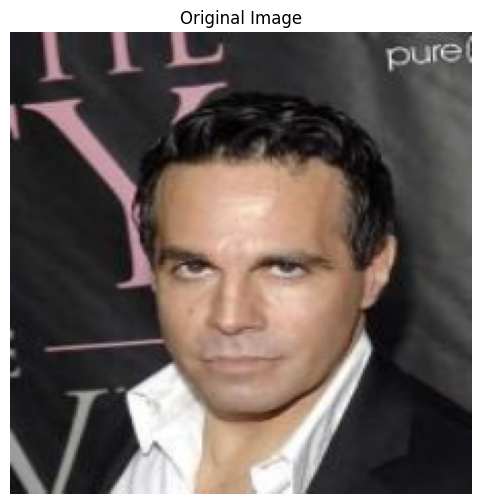

Image shape: (224, 224, 3)
Image dtype: uint8


In [64]:
### START CODE HERE ###
# Load and display an image from the CelebA dataset
data_dir = 'data/img_align_celeba/'
img_files = [f for f in os.listdir(data_dir) if f.endswith('.jpg')]

if len(img_files) > 0:
    # Use the first available image from the dataset
    img_path = os.path.join(data_dir, img_files[7])
    print(f"Loading image: {img_path}")
    
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224, 224))
else:
    # Fallback to sample image if dataset is not available
    print("Dataset not found, creating sample image")
    img = np.random.randint(0, 255, (224, 224, 3), dtype=np.uint8)

plt.figure(figsize=(8, 6))
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')
plt.show()

print(f"Image shape: {img.shape}")
print(f"Image dtype: {img.dtype}")
### END CODE HERE ###

Normalize the image using the mean and standard deviation values from the [VGG16 normalization parameters.](https://pytorch.org/vision/main/models/generated/torchvision.models.vgg16.html)
<details>
<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![image.png](https://github.com/Digital-Image-Processing-Laboratory/Image-Processing-Course-2025/blob/main/Lab5_CNN/assets/2.png?raw=true)

</details>

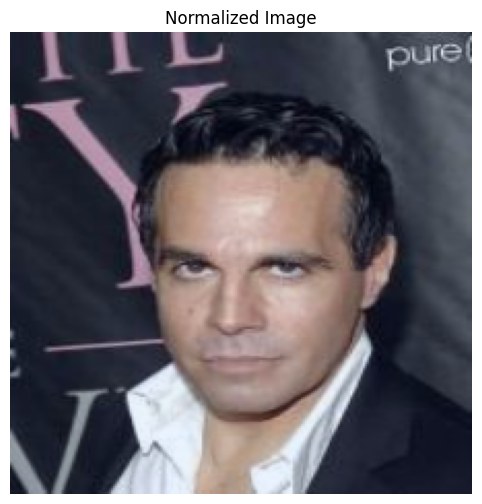

Normalized image shape: (224, 224, 3)
Normalized image range: [-2.118, 2.640]


In [65]:
### START CODE HERE ###
# Normalize the image using VGG16 normalization parameters
# VGG16 normalization: mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])

# Convert to float and normalize to [0, 1]
img_normalized = img.astype(np.float32) / 255.0

# Apply VGG16 normalization
img_normalized = (img_normalized - mean) / std

plt.figure(figsize=(8, 6))
# For display, we need to rescale back to [0,1] range
display_img = img_normalized.copy()
display_img = (display_img - display_img.min()) / (display_img.max() - display_img.min())
plt.imshow(display_img)
plt.title('Normalized Image')
plt.axis('off')
plt.show()

print(f"Normalized image shape: {img_normalized.shape}")
print(f"Normalized image range: [{img_normalized.min():.3f}, {img_normalized.max():.3f}]")
### END CODE HERE ###

Convert the [NumPy image to a PyTorch tensor](https://pytorch.org/docs/stable/torch.html#:~:text=memory%2Dmapped%20file.-,from_numpy,-Creates%20a%20Tensor), ensuring it has the [correct dimensions and data type](https://pytorch.org/vision/main/models/generated/torchvision.models.vgg16.html) for input to the first convolution layer.

In [66]:
### START CODE HERE ###
# Convert NumPy image to PyTorch tensor
# Change from HWC to CHW format and add batch dimension
img_tensor = torch.from_numpy(img_normalized.transpose(2, 0, 1)).unsqueeze(0)

print(f"Tensor shape: {img_tensor.shape}")
print(f"Tensor dtype: {img_tensor.dtype}")
print(f"Tensor range: [{img_tensor.min():.3f}, {img_tensor.max():.3f}]")
### END CODE HERE ###

Tensor shape: torch.Size([1, 3, 224, 224])
Tensor dtype: torch.float64
Tensor range: [-2.118, 2.640]


Complete the function below. <br>
The plot_featuremap function takes a set of feature maps and creates a grid of subplots, each displaying a single feature map. 

In [67]:
### START CODE HERE ###
def plot_featuremap(img, title):
    # Convert tensor to numpy if needed
    if torch.is_tensor(img):
        img = img.detach().numpy()
    
    # Remove batch dimension if present
    if img.ndim == 4:
        img = img.squeeze(0)
    
    num_channels = img.shape[0]
    
    # Calculate grid size
    cols = 8
    rows = (num_channels + cols - 1) // cols
    
    plt.figure(figsize=(16, rows * 2))
    
    for i in range(num_channels):
        plt.subplot(rows, cols, i + 1)
        feature_map = img[i]
        plt.imshow(feature_map, cmap='gray')
        plt.title(f'Channel {i}')
        plt.axis('off')
    
    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()
### END CODE HERE ###

Pass the image to the first convolutional layer and display the feature map output using your `plot_featuremap()` function.
<details>
<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![image.png](https://github.com/Digital-Image-Processing-Laboratory/Image-Processing-Course-2025/blob/main/Lab5_CNN/assets/3.png?raw=true)
</details>

Convolution output shape: torch.Size([1, 64, 224, 224])


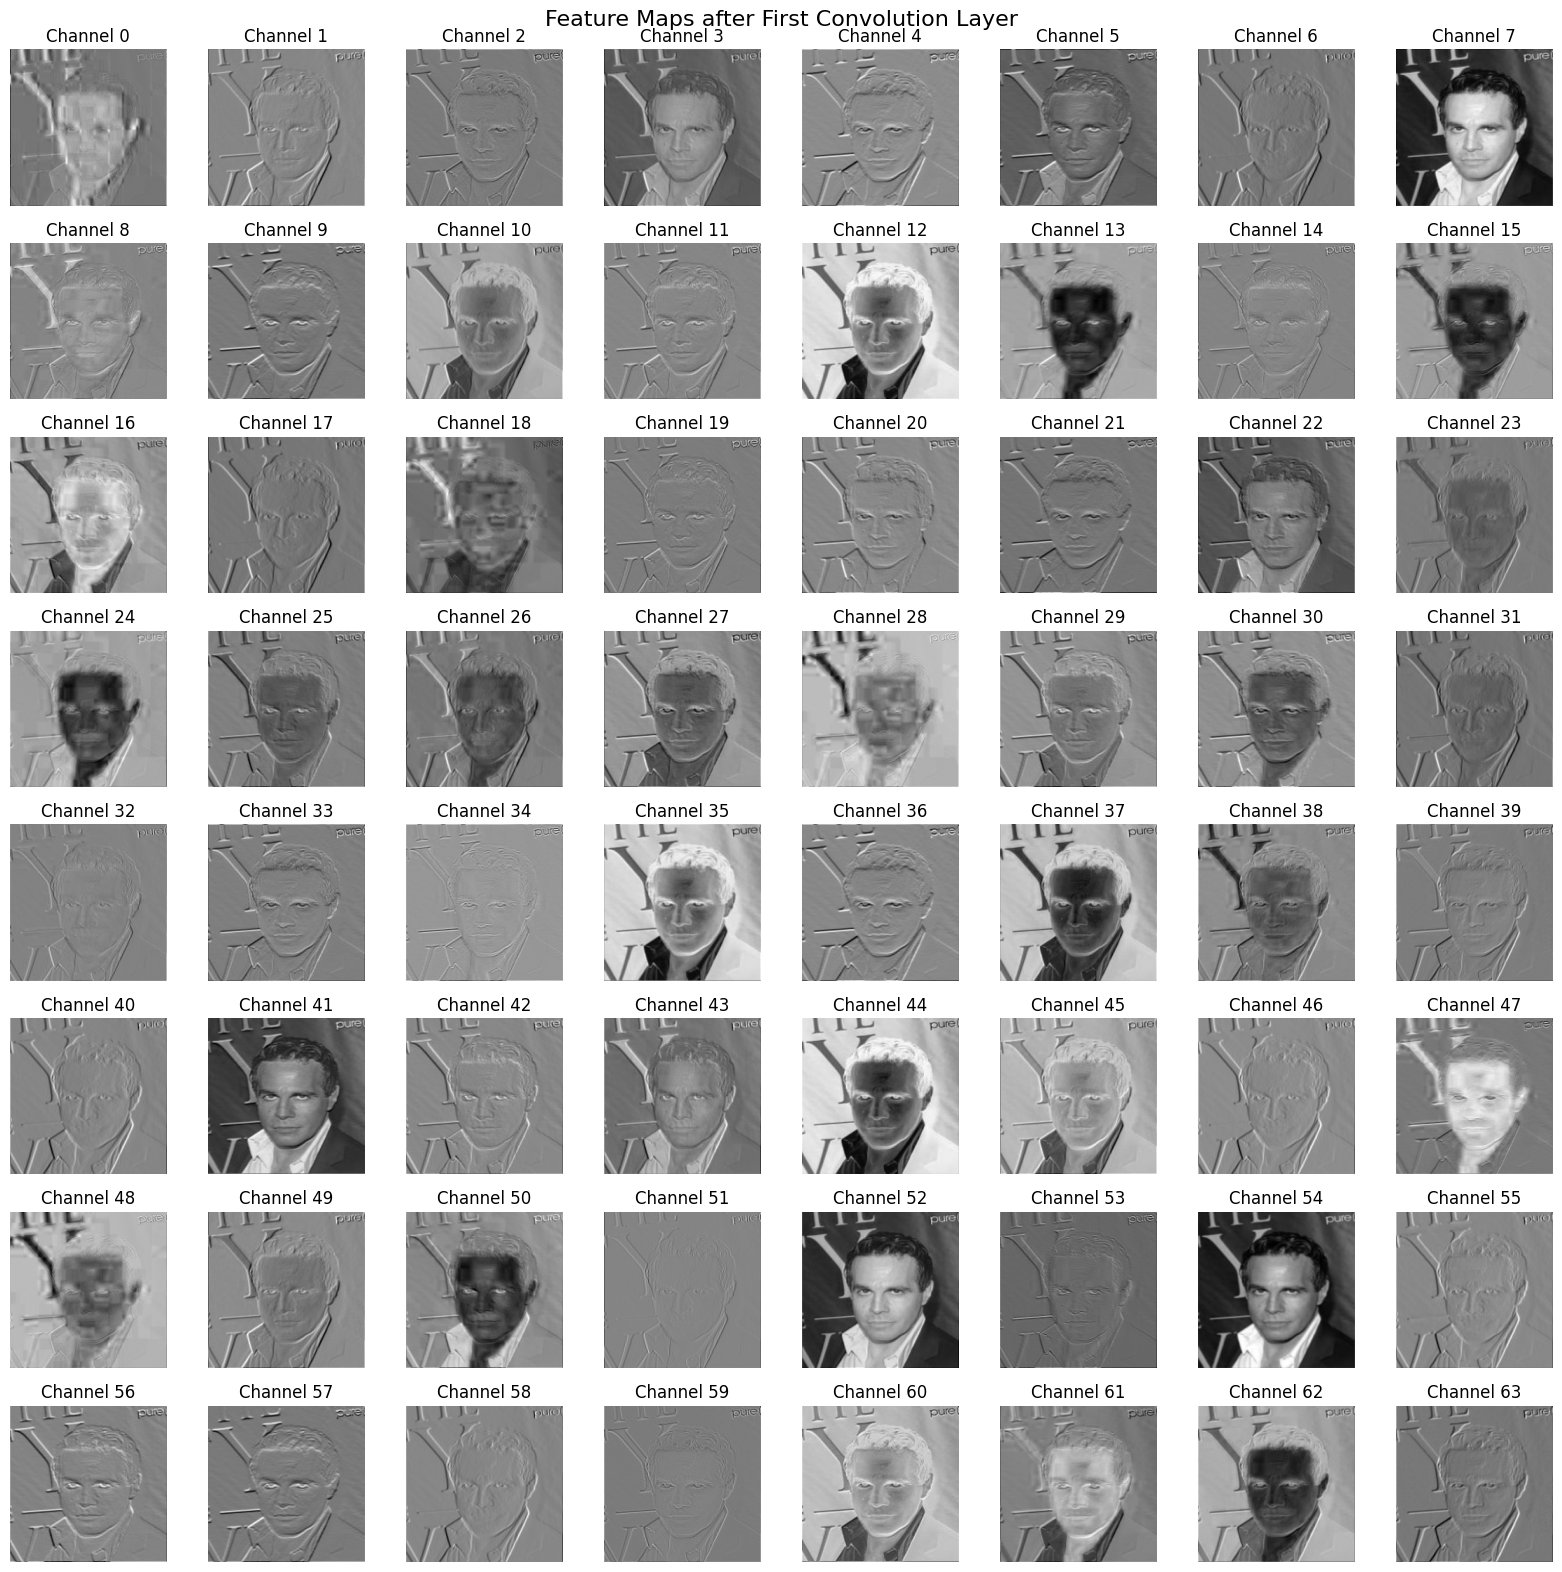

In [71]:
### START CODE HERE ###
# Pass image through first convolutional layer
with torch.no_grad():
    # Convert tensor to float32 to match VGG16 model weights
    img_tensor = img_tensor.float()
    conv_output = first_conv(img_tensor)

print(f"Convolution output shape: {conv_output.shape}")
plot_featuremap(conv_output, 'Feature Maps after First Convolution Layer')
### END CODE HERE ###

Pass the image to the first ReLU layer and display the feature map output using your `plot_featuremap()` function.
<details>
<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![image.png](https://github.com/Digital-Image-Processing-Laboratory/Image-Processing-Course-2025/blob/main/Lab5_CNN/assets/4.png?raw=true)

</details>

ReLU output shape: torch.Size([1, 64, 224, 224])


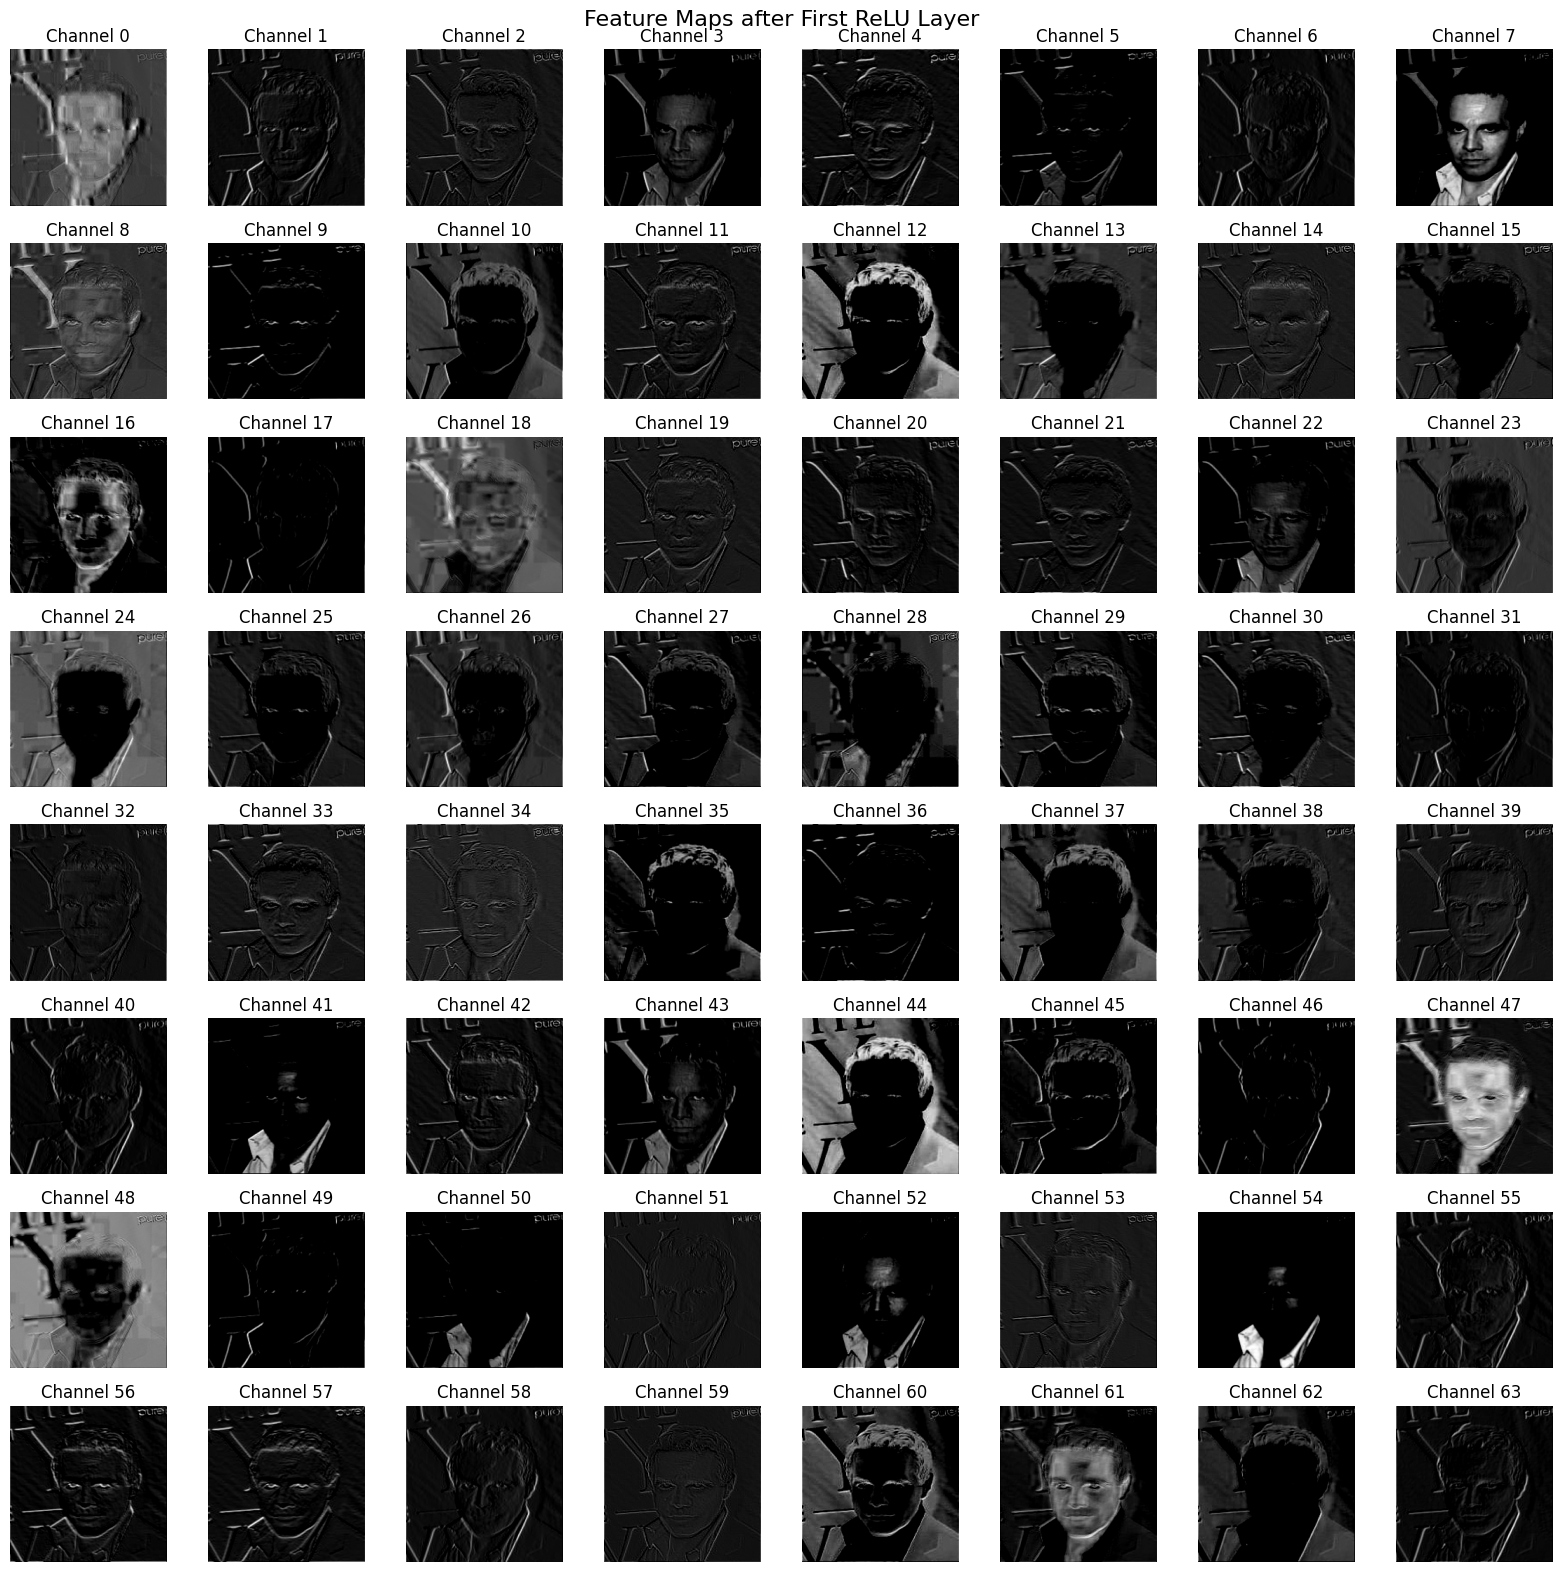

In [72]:
### START CODE HERE ###
# Pass convolution output through ReLU layer
with torch.no_grad():
    relu_output = first_relu(conv_output)

print(f"ReLU output shape: {relu_output.shape}")
plot_featuremap(relu_output, 'Feature Maps after First ReLU Layer')
### END CODE HERE ###

## Convolution 2D from scratch
Complete the function below

In [73]:
### START CODE HERE ###
def convolution2d(img, kernel, padding, stride):
    # Get dimensions
    if img.ndim == 3:
        H, W, C = img.shape
    else:
        H, W = img.shape
        C = 1
        img = img.reshape(H, W, 1)
    
    kH, kW = kernel.shape[:2]
    
    # Calculate output dimensions
    out_H = (H + 2 * padding - kH) // stride + 1
    out_W = (W + 2 * padding - kW) // stride + 1
    
    # Add padding
    if padding > 0:
        img_padded = np.zeros((H + 2*padding, W + 2*padding, C))
        img_padded[padding:padding+H, padding:padding+W, :] = img
    else:
        img_padded = img
    
    # Initialize output
    if kernel.ndim == 3:  # Multi-channel kernel
        output = np.zeros((out_H, out_W))
    else:  # Single channel kernel
        output = np.zeros((out_H, out_W))
    
    # Perform convolution
    for i in range(0, out_H):
        for j in range(0, out_W):
            h_start = i * stride
            h_end = h_start + kH
            w_start = j * stride
            w_end = w_start + kW
            
            region = img_padded[h_start:h_end, w_start:w_end, :]
            
            if kernel.ndim == 3:  # Multi-channel kernel
                output[i, j] = np.sum(region * kernel)
            else:  # Single channel kernel
                output[i, j] = np.sum(region[:, :, 0] * kernel)
    
    return output
### END CODE HERE ###

Copy the weights and biases from `vgg16` and then use each kernel perform a 2D convolution using `convolution2d` and display the resulting feature map
<details>
<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![image.png](https://github.com/Digital-Image-Processing-Laboratory/Image-Processing-Course-2025/blob/main/Lab5_CNN/assets/5.png?raw=true)

</details>

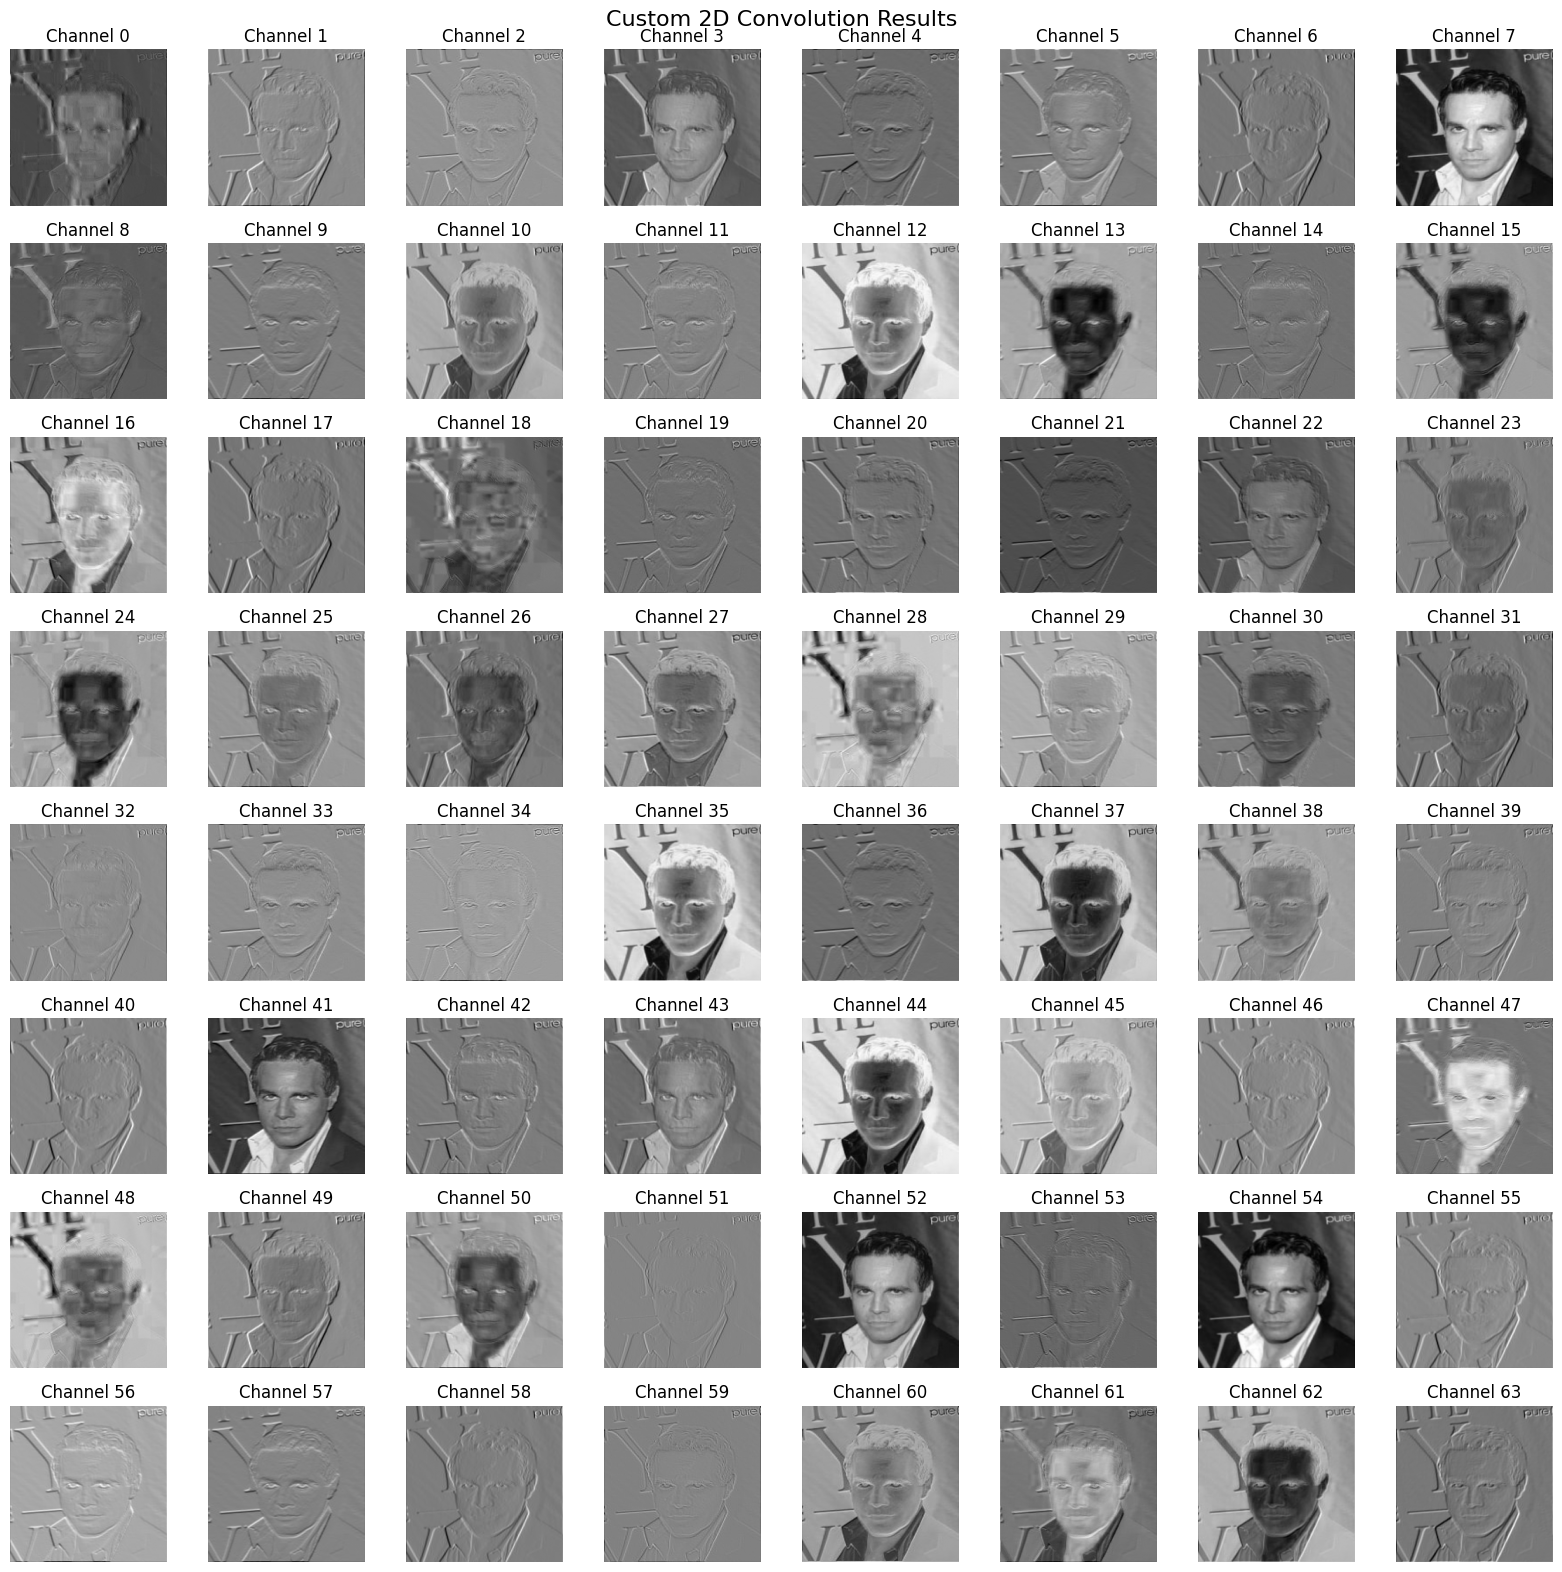

In [82]:
### START CODE HERE ###
# Get weights and biases from VGG16
weights = first_conv.weight.detach().numpy()
biases = first_conv.bias.detach().numpy()

# Use original image (before normalization) for custom convolution
img_for_conv = img.astype(np.float32) / 255.0

# Apply convolution with first few kernels
num_kernels_to_show = 64
custom_outputs = []

for i in range(num_kernels_to_show):
    kernel = weights[i]  # Shape: (3, 3, 3)
    kernel = kernel.transpose(1, 2, 0)  # Change to (3, 3, 3) for our function
    
    output = convolution2d(img_for_conv, kernel, padding=1, stride=1)
    output += biases[i]  # Add bias
    custom_outputs.append(output)

# Display results
custom_outputs = np.array(custom_outputs)
plot_featuremap(custom_outputs, 'Custom 2D Convolution Results')
### END CODE HERE ###

After performing the `convolution2d` operation, apply the ReLU activation function to the output. Then, display the resulting feature map.
<details>
<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![image.png](https://github.com/Digital-Image-Processing-Laboratory/Image-Processing-Course-2025/blob/main/Lab5_CNN/assets/6.png?raw=true)

</details>

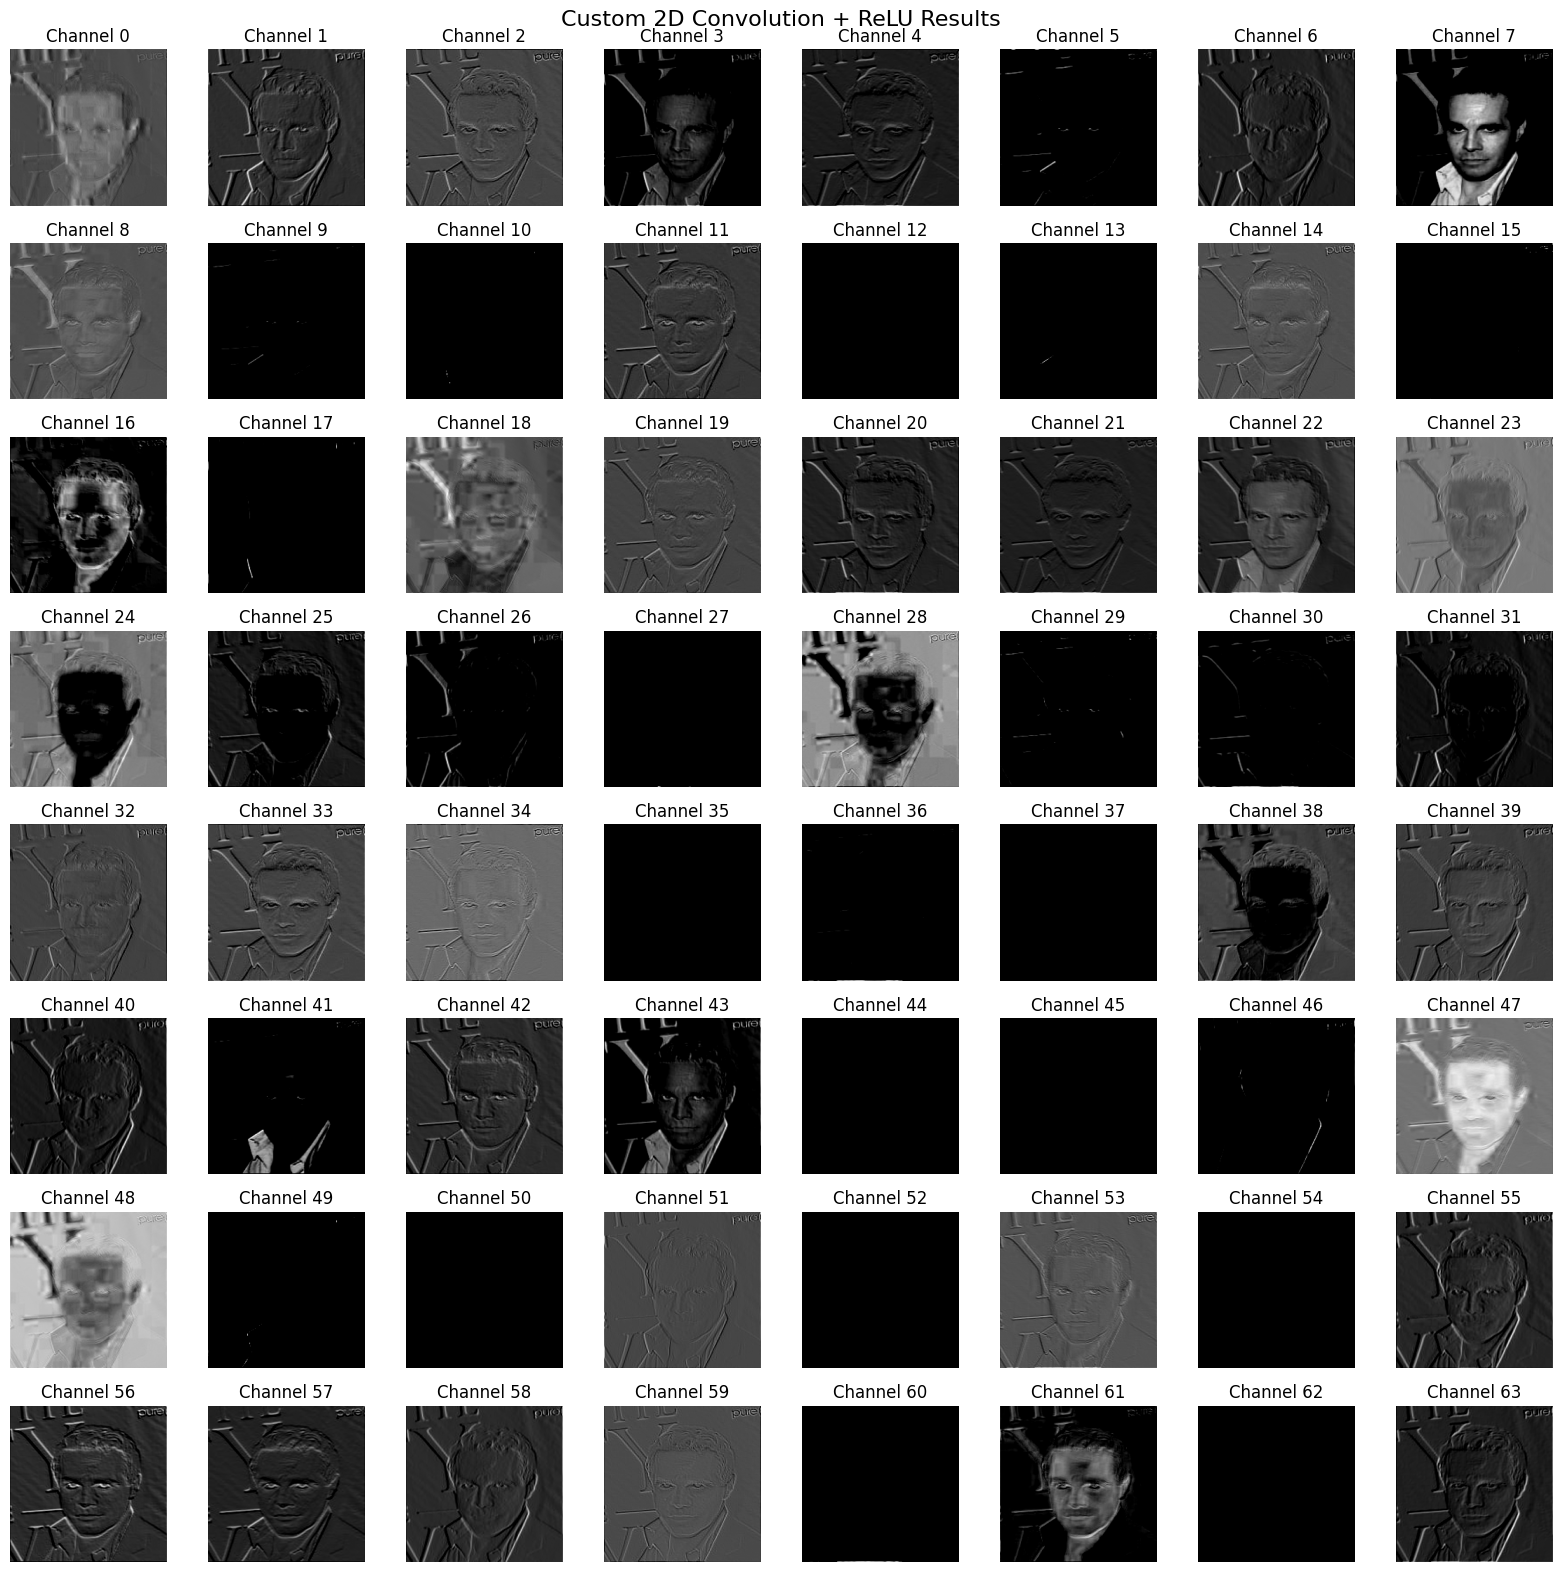

Difference between custom and PyTorch convolution (mean absolute error):
Convolution: 0.429264
After ReLU: 0.157863


In [84]:
### START CODE HERE ###
# Apply ReLU activation to custom convolution results
custom_relu_outputs = []

for output in custom_outputs:
    relu_activated = np.maximum(0, output)  # ReLU: max(0, x)
    custom_relu_outputs.append(relu_activated)

custom_relu_outputs = np.array(custom_relu_outputs)
plot_featuremap(custom_relu_outputs, 'Custom 2D Convolution + ReLU Results')

# Compare with PyTorch results (first 8 channels)
# Get the PyTorch ReLU output from the previous cell
pytorch_conv_results = conv_output.squeeze(0).detach().numpy()
pytorch_relu_results = first_relu(conv_output).squeeze(0).detach().numpy()

print("Difference between custom and PyTorch convolution (mean absolute error):")
print(f"Convolution: {np.mean(np.abs(custom_outputs - pytorch_conv_results)):.6f}")
print(f"After ReLU: {np.mean(np.abs(custom_relu_outputs - pytorch_relu_results)):.6f}")
### END CODE HERE ###

---

# Question
1. Show the array of kernel weights used for extracting object color 
and those used for extracting object edge details at least two CNN nodes.
Compare and Discuss how the specific values of these kernel weights influence the CNN's ability 
to detect colors versus edges in images.
2. Why is Matplotlib able to display the output feature map from the convolution layer, even though it contains negative values?
3. Is there a method faster than traditional 2D convolution in the "Convolution 2D from scratch" section?